In [1]:
import numpy as np
import matplotlib.pyplot as plt


(0.0, 20.0)

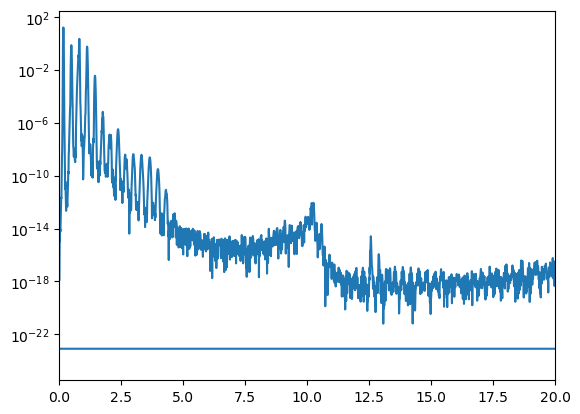

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
root = "//data/becker/dopl4670/TDSE_Jobs/Test_Benchmarks/qprop_linear_new/"
A_file = "TDSE_files/A_func.npy"
t_file = "TDSE_files/t.npy"
a_file = "TDSE_files/HHG.npy"

A = np.load(root + A_file)
t = np.load(root + t_file)
a = np.load(root + a_file)

ax = a[0,:]
ay = a[1,:]
az = a[2,:]

# Compute the electric field
E = -np.gradient(A, t)

# Blackman window
W = 0.42 - 0.5 * np.cos(2 * np.pi * t / np.max(t)) + 0.08 * np.cos(4 * np.pi * t / np.max(t))
dipolex = (-ax)*W
dipoley = (-ay)*W
dipolez = (-az-E)*W





Fx = np.fft.fft(dipolex)
Fy = np.fft.fft(dipoley)
Fz = np.fft.fft(dipolez)

# Compute the corresponding frequencies
frequencies = np.fft.fftfreq(len(t), t[1] - t[0])

Px = np.abs(Fx)**2
Py = np.abs(Fy)**2
Pz = np.abs(Fz)**2

# Sum the contributions to get the total spectrum
P_total = Px + Py + Pz

plt.semilogy(frequencies/0.085, P_total)
plt.xlim([0,20])

# Plot the spectrum
# plt.figure()
# plt.semilogy(frequencies/0.085, np.real(P_total))
# plt.xlabel('Frequency (arb. units)')
# plt.ylabel('Power Spectrum (arb. units)')
# plt.title('HHG Spectrum')
# plt.xlim([0,10])
# plt.show()






